In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import preprocessing
import datetime as dt
from sklearn.linear_model import LassoCV
import seaborn as sns

In [4]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [7]:
train_data = pd.read_csv("D:\\APP\\NITW\\Mid-Program Project\\Dataset\\train.csv")

In [8]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [9]:
train_labels = pd.read_csv("D:\\APP\\NITW\\Mid-Program Project\\Dataset\\train_label.csv", header=None)

In [10]:
train_labels.head()

,0
0,504
1,5
2,139
3,209
4,184


In [11]:
train_data['Total_booking'] = train_labels

In [12]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [13]:
test_data = pd.read_csv("D:\\APP\\NITW\\Mid-Program Project\\Dataset\\test.csv")

In [14]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [15]:
test_labels = pd.read_csv("D:\\APP\\NITW\\Mid-Program Project\\Dataset\\test_label.csv", header=None)

# **[Task:1, Point:3] Missing value analysis**

**Null Check - I**

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
datetime         8708 non-null object
season           8708 non-null object
holiday          8708 non-null int64
workingday       8708 non-null int64
weather          8708 non-null object
temp             8708 non-null float64
atemp            8708 non-null float64
humidity         8708 non-null int64
windspeed        8708 non-null float64
Total_booking    8708 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


**Null Check - II**

In [17]:
train_data.isnull().any()

datetime         False
season           False
holiday          False
workingday       False
weather          False
temp             False
atemp            False
humidity         False
windspeed        False
Total_booking    False
dtype: bool

From Null checks I & II, there are no null values in train dataset. 

In [18]:
train_data.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [19]:
le = preprocessing.LabelEncoder()

In [20]:
# Creating a copy of original TRAIN dataset to apply label encoding
train_data_transform = train_data.copy()

In [21]:
# Creating a copy of original TEST dataset to apply label encoding
test_data_transform = test_data.copy()

In [22]:
# Label encoding 'weather' column of test data
train_data_transform['weather'] = le.fit_transform(train_data_transform['weather'])

In [23]:
# Label encoding 'season' column
train_data_transform['season'] = le.fit_transform(train_data_transform['season'])

In [24]:
# Label encoding 'weather' column of test data
test_data_transform['weather'] = le.fit_transform(test_data_transform['weather'])

In [25]:
# Label encoding 'season' column of test data
test_data_transform['season'] = le.fit_transform(test_data_transform['season'])

In [26]:
train_data_transform.shape

(8708, 10)

In [27]:
train_data_transform.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,2,0,1,0,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,0,0,1,0,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,1,0,1,0,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,3,0,1,0,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,0,0,1,0,30.34,33.335,51,19.0012,184


# **[Task: 1, Point: 1 & 4] Visualize data**

In [28]:
# Check unique values in 'weather' column
train_data_transform['weather'].unique()

array([0, 2, 3, 1], dtype=int64)

In [29]:
weather_tab = pd.crosstab(index=train_data['weather'], columns='count by weather')

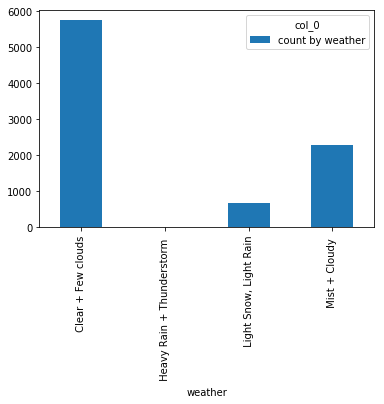

In [30]:
# Plot barchart to understand weather-wise Total_booking
weather_tab.plot.bar()

In [31]:
# Check unique values in 'season' column
train_data_transform['season'].unique()

array([2, 0, 1, 3], dtype=int64)

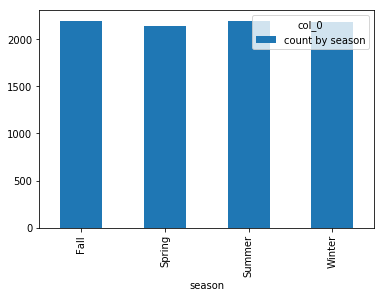

In [32]:
season_tab = pd.crosstab(index=train_data['season'], columns='count by season')
# Plot barchart to understand season-wise Total_booking
season_tab.plot.bar()

In [100]:
train_data_transform['datetime_numerical'] = pd.to_datetime(train_data_transform['datetime'])
train_data_transform['datetime_numerical'] = train_data_transform['datetime_numerical'].map(dt.datetime.toordinal)

In [101]:
test_data_transform['datetime_numerical'] = pd.to_datetime(test_data_transform['datetime'])
test_data_transform['datetime_numerical'] = test_data_transform['datetime_numerical'].map(dt.datetime.toordinal)

## **[Task:1, Point:5] Correlation Analysis**

In [37]:
X = train_data_transform.drop(columns=['Total_booking', 'datetime'])
y = train_data_transform['Total_booking']

**Method:1 Embedded Method using Lasso Model**

In [38]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 12.091000
Best score using built-in LassoCV: 0.310741


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [39]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

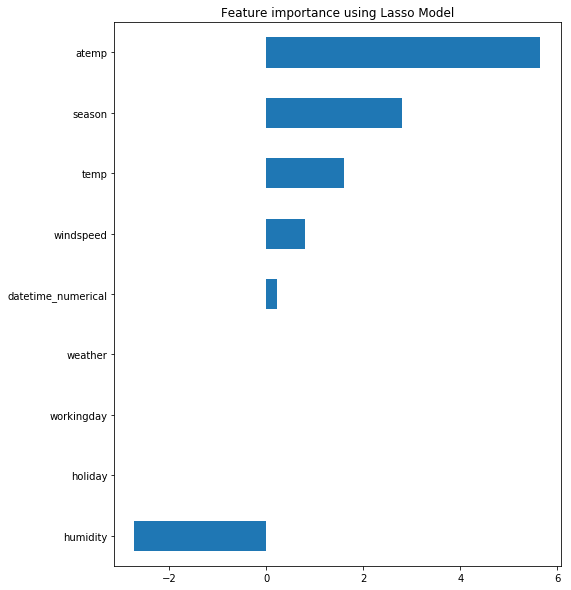

In [40]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = 'barh')
plt.title("Feature importance using Lasso Model")

**Method:2 Pearson Coefficient**

In [41]:
train_data_transform.corr(method='pearson')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,datetime_numerical
season,1.000000,-0.007236,0.005784,0.060624,-0.380153,-0.346962,0.061593,-0.006530,-0.008503,0.192286
holiday,-0.007236,1.000000,-0.249755,0.004602,-0.000165,-0.005526,-0.004567,0.008075,-0.004391,0.010277
workingday,0.005784,-0.249755,1.000000,0.015095,0.032189,0.026168,-0.009282,0.013035,0.012285,-0.006173
weather,0.060624,0.004602,0.015095,1.000000,-0.058179,-0.053863,0.336430,-0.028814,-0.082382,0.016994
temp,-0.380153,-0.000165,0.032189,-0.058179,1.000000,0.984035,-0.066419,-0.027824,0.397456,0.183744
atemp,-0.346962,-0.005526,0.026168,-0.053863,0.984035,1.000000,-0.044206,-0.068911,0.392754,0.184282
humidity,0.061593,-0.004567,-0.009282,0.336430,-0.066419,-0.044206,1.000000,-0.320346,-0.307982,0.034716
windspeed,-0.006530,0.008075,0.013035,-0.028814,-0.027824,-0.068911,-0.320346,1.000000,0.092090,-0.092120
Total_booking,-0.008503,-0.004391,0.012285,-0.082382,0.397456,0.392754,-0.307982,0.092090,1.000000,0.314940
datetime_numerical,0.192286,0.010277,-0.006173,0.016994,0.183744,0.184282,0.034716,-0.092120,0.314940,1.000000


From Method-1 & Method-2 of Correlation Analysis, we can ignore 'holiday' and 'workingday' features as they have nearly 0 correlation with target variable 'Total_booking'

## **[Task:1, Point:2] Outlier Analysis**

**Method-1: Boxplot**

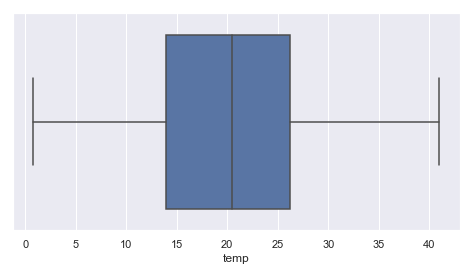

In [42]:
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=train_data['temp'])

We do not have any outliers in 'temp' column.

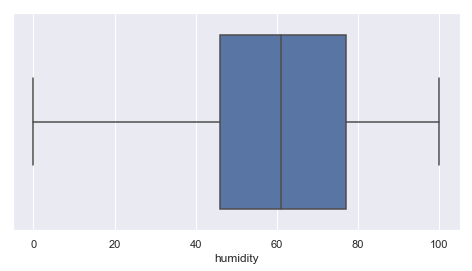

In [43]:
sns.boxplot(x=train_data['humidity'])

We do not have any outliers in humidity column.

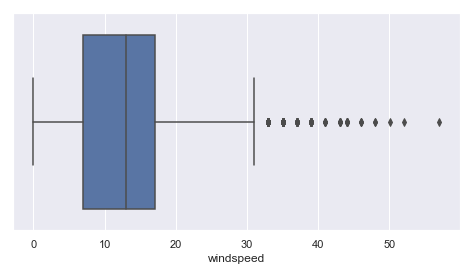

In [44]:
sns.boxplot(x=train_data['windspeed'])

We have outliers in windspeed above value of 30.

We have to do Outlier Analysis only for 'temp', 'humidity' and 'windspeed'. 

'holiday' and 'workingday' are not considered for analysis due to low correation. 

'season' and 'weather' cannot have outliers as they are label encoded.

**Method-2: Z-Score**

In [45]:
z = np.abs(stats.zscore(train_data_transform.drop(columns=['datetime', 'holiday', 'workingday', 'season', 'weather'])))
#z = np.abs(stats.zscore(train_data['windspeed']))

In [46]:
print(z)

[[0.24279646 0.24756413 0.79958574 0.50721471 1.71306563 0.59492242]
 [1.08241785 1.13867577 0.90376068 0.75182255 1.03561284 1.19073975]
 [1.85625701 2.06991433 0.60677596 1.11832527 0.29749077 1.65121435]
 ...
 [0.45270181 0.42578646 0.29425114 0.46958048 1.05764634 1.23035925]
 [1.12158829 1.17880269 0.03381379 0.50721471 0.55638433 1.48864842]
 [1.85625701 2.06991433 0.60677596 0.87371743 0.89239513 1.66540048]]


In [47]:
threshold = 3
print(np.where(z > threshold))

(array([   5,   27,   30,   52,  156,  257,  279,  288,  325,  343,  510,
        566,  575,  687,  750,  762,  838,  891,  946,  956,  970,  971,
       1008, 1162, 1200, 1243, 1312, 1336, 1357, 1375, 1413, 1446, 1489,
       1561, 1591, 1601, 1675, 1799, 1878, 1894, 1952, 2023, 2065, 2085,
       2116, 2120, 2126, 2184, 2193, 2357, 2386, 2444, 2491, 2550, 2637,
       2663, 2771, 2793, 2800, 2811, 2825, 2878, 2883, 2963, 2976, 3048,
       3055, 3080, 3099, 3101, 3226, 3250, 3304, 3338, 3351, 3374, 3389,
       3441, 3523, 3548, 3595, 3599, 3646, 3733, 3799, 3799, 3816, 3907,
       3915, 3948, 4018, 4148, 4191, 4202, 4211, 4246, 4369, 4417, 4489,
       4604, 4764, 4765, 4766, 4773, 4798, 4841, 4853, 4887, 4888, 4956,
       4980, 5017, 5065, 5125, 5152, 5167, 5247, 5265, 5316, 5359, 5362,
       5410, 5485, 5502, 5531, 5603, 5634, 5651, 5665, 5685, 5703, 5731,
       5862, 5888, 5890, 6009, 6070, 6080, 6143, 6311, 6314, 6347, 6350,
       6401, 6428, 6433, 6583, 6603, 6609, 6610, 6

In [48]:
train_data_transform.shape

(8708, 11)

In [49]:
train_data_transform = train_data_transform[(z < threshold).all(axis=1)]

In [50]:
train_data_transform.shape

(8526, 11)

In [51]:
train_data_transform['Total_booking'].shape

(8526,)

In [66]:
test_data_transform.shape

(2178, 10)

In [67]:
test_labels.shape

(2178, 1)

In [97]:
def train_eval(algorithm, grid_params, X_train, X_test, y_train, y_test):
    regression_model = GridSearchCV(algorithm, grid_params, cv=5, n_jobs=-1, verbose=1)
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    print("R2: \t", r2_score(y_test, y_pred))
    print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE: \t", mean_absolute_error(y_test, y_pred))
    return regression_model

In [305]:
#train_data_transform['datetime'] = [datetime.datetime.strptime(d, '%m/%d/%Y %H:%M') for d in train_data_transform['datetime']]

In [68]:
X_train = train_data_transform.drop(columns=['Total_booking', 'datetime'])
y_train = train_data_transform['Total_booking']

In [69]:
X_test = test_data_transform.drop(columns=['datetime'])
y_test = test_labels

In [70]:
X_test.shape

(2178, 9)

In [71]:
y_test.shape

(2178, 1)

## **[Test:2, Point:3] Regression Analysis**

**Linear Regression Model**

In [98]:
train_eval(LinearRegression(), {}, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s


R2: 	 0.3240181535624902
RMSE: 	 147.49172624303225
MAE: 	 110.27646271817639


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

**KNeighborsRegressor Model**

In [73]:
knn_params = {'n_neighbors' : [1, 5, 10, 20, 30, 50, 75, 100, 200, 500, 1000, 2000, 5000]}
train_eval(KNeighborsRegressor(), knn_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  65 | elapsed:    4.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:  1.7min finished


R2: 	 0.3789979439356955
RMSE: 	 141.36655058868897
MAE: 	 100.94306703397612


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 5, 10, 20, 30, 50, 75, 100, 200, 500, 1000, 2000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

**DecisionTreeRegressor Model**

In [99]:
tree_params = {}
train_eval(DecisionTreeRegressor(), tree_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


R2: 	 0.049807622731844914
RMSE: 	 174.86621634448392
MAE: 	 116.78891184573003


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

**Ensemble Model: Random Forest**

In [75]:
rf_params = {'n_estimators': [1000], 'max_depth': [None], 'min_samples_split': [2]}
rf_model = train_eval(RandomForestRegressor(), rf_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   43.1s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.8s finished


R2: 	 0.42970032221523347
RMSE: 	 135.47267464871732
MAE: 	 93.14937387322783


**Scaling and Centering the data**

In [76]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train[X_train.columns] = scaler.transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


**Again applying different Regression models**

**Linear Regression Model (Post Scaling)**

In [77]:
train_eval(LinearRegression(), {}, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


R2: 	 0.3240181535624902
RMSE: 	 147.49172624303225
MAE: 	 110.27646271817639


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

**KNeighborsRegressor Model (Post Scaling)**

In [78]:
knn_params = {'n_neighbors' : [1, 5, 10, 20, 30, 50, 75, 100, 200, 500, 1000, 2000, 5000]}
train_eval(KNeighborsRegressor(), knn_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:  2.7min finished


R2: 	 0.376736699339276
RMSE: 	 141.6236945683074
MAE: 	 100.72148760330579


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 5, 10, 20, 30, 50, 75, 100, 200, 500, 1000, 2000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

**DecisionTreeRegressor Model(Post Scaling)**

In [79]:
tree_params = {}
train_eval(DecisionTreeRegressor(), tree_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.0min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished


R2: 	 0.01724635743770886
RMSE: 	 177.83714320657865
MAE: 	 118.81726354453629


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

**Ensemble Model: Random Forest(Post Scaling)**

In [82]:
rf_params = {'n_estimators': [1000], 'max_depth': [None], 'min_samples_split': [2]}
rf_model = train_eval(RandomForestRegressor(), rf_params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   38.5s remaining:   57.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.3s finished


R2: 	 0.4296077853296205
RMSE: 	 135.4836651081154
MAE: 	 93.22300937833337


**Conclusion: Ensemble model(Random Forest), after Scaling, provides the best score amongst all the Regression models.**